## Introduction

In this kernal Iam going to explain the famous Titanic Challenge. The challenge is to use machine learning to create a model that predicts which passengers survived the Titanic shipwreck

I have tried out 2 approches, one explained in this notebook, the other approach exaplained in another notebooks with title 'Titanic_Approach-2_Part-II' & 'Titanic_Approach-2_Part-II'

### Preprocessing steps we are going to explained

1)Import libraries

2)checked the data types

3)Extracted 'NAME' column from both train and test datasets. A column 'Title' is created and the extracted names are put in that column .For each title checked for 'SEX' column if a name is male or female 

   **IN THIS I FILLED THE NULL VALUES OF 'AGE' COLUMN IN TWO DIFFERENT TYPES**
   
   **METHOD I**
   
4)split the table with reference to the Title column which has 5 values that are mr,mrs,miss,master,rare resulting into 5 tables

5)Then filled the NAN values column with mean() of the respective tables(mr,mrs,miss,master,rare)

6)After filling, 5 tables(mr,mrs,miss,master,rare) are joined


   **METHOD II** 
   
7)filled the null values of the 'Age' column with entire mean of the 'Age' column

8)Removed the columns which had duplicates and less correlation with dependent variable


9)created the new columns to get the maximum survival rate

10)Assigned the LabelEncoder and OneHotEncoder to the categorical varibles

11)Fit few machine learning algorithms(Random Forest,Decision Tree,Logistic Regression,KNN,Support Vector Machines,Naive Bayes,Stochastic Gradient Decent) on the data

### comparing the scores of different models obtained using 2 methods in this notebook
| Model                       | Method I Score | Method II Score |
| --------------------------- | -------------- | --------------- |
| Random Forest               |**83.21 **      | **77.99**       |
| Decision Tree               |  83.21         |   77.99         |
| Support Vector Machines     |  78.36         |   77.24         |
| Logistic Regression         |  78.36         |   76.12         |
| Naive Bayes                 |  77.99         |   74.63         |
| Stochastic Gradient Decent  |  69.40         |   74.63         |
| KNN                         |  54.48         |   69.03         |

**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


**load the dataets where**
1. **a** is a train dataset and 
2. **b** is a test dataset

In [2]:
a=pd.read_csv('train (1).csv')
b=pd.read_csv('test.csv')
a.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Data Exploration/Analysis**

In [3]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**The training-set has 891 examples and 11 features + the target variable (survived). 2 of the features are floats, 5 are integers and 5 are objects. Below I have listed the features with a short description:**

survived:   Survival
<br>PassengerId: Unique Id of a passenger.
<br>pclass: Ticket class    
sex:    Sex 
Age:    Age in years    
sibsp:  # of siblings / spouses aboard the Titanic  
parch:  # of parents / children aboard the Titanic  
ticket: Ticket number   
fare:   Passenger fare  
cabin:  Cabin number    
embarked:   Port of Embarkation

In [4]:
a.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Above we can see that 38% out of the training-set survived the Titanic. We can also see that the passenger ages range from 0.4 to 80. On top of that we can already detect some features, that contain missing values, like the 'Age' feature.**

**In this cell we are trying to fill the Null values of 'Age' columns in 2 different types, creating a new variable for that**

In [5]:
a_total_mean=a
b_total_mean=b
a_total_mean.shape,b_total_mean.shape

((891, 12), (418, 11))

**extracted the NAME column in both train and test datasets and keeping it on Title column.Then checked the male and female of the each titlename**

In [6]:
combine=[a,b]
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(a['Title'], a['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [7]:
combine1=[a_total_mean,b_total_mean]
for dataset1 in combine1:
    dataset1['Title'] = dataset1.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(a_total_mean['Title'], a_total_mean['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


**From the crosstab, whereever count of female/male is found in single digits, I replaced the title to Rare.Then taking the survived rate of the Title with the mean**

In [8]:
#method1
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
a[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [9]:
#method2
for dataset1 in combine1:
    dataset1['Title'] = dataset1['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset1['Title'] = dataset1['Title'].replace('Mlle', 'Miss')
    dataset1['Title'] = dataset1['Title'].replace('Ms', 'Miss')
    dataset1['Title'] = dataset1['Title'].replace('Mme', 'Mrs')
    
a_total_mean[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


**we are checking the count of people on the ship by 'Title'**

In [10]:
a[['Title', 'Survived']].groupby(['Title'], as_index=False).count()

,Title,Survived
0,Master,40
1,Miss,185
2,Mr,517
3,Mrs,126
4,Rare,23


**we are checking the count of people survived by 'Title'**

In [11]:
a[['Title', 'Survived']].groupby(['Title'], as_index=False).sum()

,Title,Survived
0,Master,23
1,Miss,130
2,Mr,81
3,Mrs,100
4,Rare,8


### METHOD-1

**In this we are creating an array to split the table**

In [12]:
T=a['Title'].unique()

**we split the traindataset table with 'Title' column that has 'mr','mrs','miss','master' and 'rare'. The missing values of 'Age'column of the each table are filled with 'Age' column of mean of their respective tables. After that the 5 tables are combined to 1 complete table of a1**

In [13]:
res=[]
for Tech in T:
    tmp=a[a['Title']==Tech]
    tmp['Age']=tmp.Age.fillna(tmp.Age.mean())
    res.append(tmp)

    
a1=pd.concat(res,sort=True)    

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [14]:
a1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 886
Data columns (total 13 columns):
Age            891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Fare           891 non-null float64
Name           891 non-null object
Parch          891 non-null int64
PassengerId    891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
SibSp          891 non-null int64
Survived       891 non-null int64
Ticket         891 non-null object
Title          891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 97.5+ KB


In [15]:
res1=[]

**we split the traindataset table with 'Title' column that has 'mr','mrs','miss','master' and 'rare'. The missing values of 'Age'column of the each table are filled with 'Age' column of mean of their respective tables. After that the 5 tables are combined to 1 complete table of b1**

In [16]:
for Tech1 in T:
    tmp1=b[b['Title']==Tech1]
    tmp1['Age']=tmp1.Age.fillna(tmp1.Age.mean())
    res1.append(tmp1)
b1=pd.concat(res1,sort=True)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
b1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 414
Data columns (total 12 columns):
Age            418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Fare           417 non-null float64
Name           418 non-null object
Parch          418 non-null int64
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
SibSp          418 non-null int64
Ticket         418 non-null object
Title          418 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 42.5+ KB


### METHOD-2

**where in the below we are filling the Null values of 'Age' column in another type**

In [18]:
a_total_mean['Age']=a_total_mean.Age.fillna(a_total_mean.Age.mean())
b_total_mean['Age']=b_total_mean.Age.fillna(b_total_mean.Age.mean())

In [19]:
a_total_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [20]:
b_total_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Title          418 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 39.3+ KB


**combining a1(obtained by method 1) and b1(obtained by method 1) tables and mapping the Title column of mr,mrs,miss,master,rare to 1,2,3,4,5**

In [21]:
#METHOD-1
combine=[a1,b1]
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

a1.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.00000,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,1
4,35.00000,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,1
5,32.36809,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0,330877,1
6,54.00000,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0,17463,1
12,20.00000,NaN,S,8.0500,"Saundercock, Mr. William Henry",0,13,3,male,0,0,A/5. 2151,1


**combining a_total_mean(obtained by method 2) and b_total_mean(obtained by method 2) tables and mapping the Title column of mr,mrs,miss,master,rare to 1,2,3,4,5**

In [22]:
combine1=[a_total_mean,b_total_mean]
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset1 in combine1:
    dataset1['Title'] = dataset1['Title'].map(title_mapping)
    dataset1['Title'] = dataset1['Title'].fillna(0)

a_total_mean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


**Droping the columns of Ticket,Cabin,Name,PassengerId in both the tables of a1 and b1**

In [23]:
#METHOD-1 
a1 = a1.drop(['Ticket', 'Cabin','Name', 'PassengerId'], axis=1)
b1 = b1.drop(['Ticket', 'Cabin','Name'], axis=1)

In [24]:
#METHOD-2
a_total_mean = a_total_mean.drop(['Ticket', 'Cabin','Name', 'PassengerId'], axis=1)
b_total_mean = b_total_mean.drop(['Ticket', 'Cabin','Name'], axis=1)

**filling the missing value of Fare column with mean in b1 table**

In [25]:
#METHOD-1
b1['Fare']=b1.Fare.fillna(b1.Fare.mean())

In [26]:
#METHOD-2
b_total_mean['Fare']=b_total_mean.Fare.fillna(b_total_mean.Fare.mean())

In [27]:
a1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 886
Data columns (total 9 columns):
Age         891 non-null float64
Embarked    889 non-null object
Fare        891 non-null float64
Parch       891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
SibSp       891 non-null int64
Survived    891 non-null int64
Title       891 non-null int64
dtypes: float64(2), int64(5), object(2)
memory usage: 69.6+ KB


**changing datatype of 'Age','Fare' columns to int in both tables of a1 and b1**

In [28]:
#METHOD-1
combine=[a1,b1]
for dataset in combine:
    dataset['Age']=dataset['Age'].astype(int)
    dataset['Fare']=dataset['Fare'].astype(int)

In [29]:
#METHOD-2
combine1=[a_total_mean,b_total_mean]
for dataset in combine1:
    dataset['Age']=dataset['Age'].astype(int)
    dataset['Fare']=dataset['Fare'].astype(int)

**Embarked column has Null values.so checking the details of the Embarked column**

In [30]:
a['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

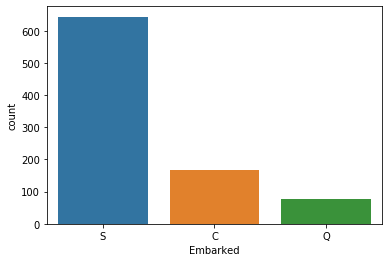

In [31]:
import seaborn as sns
sns.countplot(x='Embarked',data=a)
plt.show()

**In Embarked column most frequent port is 'S'.so we are filling the Null values with 'S'**

In [32]:
#METHOD-1
common_value = 'S'
combine = [a1,b1]

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [33]:
#METHOD-2
common_value = 'S'
combine1 = [a_total_mean,b_total_mean]

for dataset1 in combine1:
    dataset1['Embarked'] = dataset1['Embarked'].fillna(common_value)

In [34]:
#METHOD-1
combine = [a1, b1]

for dataset in combine:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [35]:
#METHOD-2
combine1 = [a_total_mean, b_total_mean]

for dataset1 in combine1:
    dataset1['Fare'] = dataset1['Fare'].fillna(0)
    dataset1['Fare'] = dataset1['Fare'].astype(int)

**combining the 'SibSp','Parch' and forming the 'relative' column .if the number of relatives is zero we are assigning 1 and if the number of relatives are not zero we are assigning 0 in the 'not_alone' column**

In [36]:
#METHOD-1
combine = [a1, b1]
for dataset in combine:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)

In [37]:
#METHOD-2
combine1 = [a_total_mean, b_total_mean]
for dataset1 in combine1:
    dataset1['relatives'] = dataset1['SibSp'] + dataset1['Parch']
    dataset1.loc[dataset1['relatives'] > 0, 'not_alone'] = 0
    dataset1.loc[dataset1['relatives'] == 0, 'not_alone'] = 1
    dataset1['not_alone'] = dataset1['not_alone'].astype(int)

**In 'Embarked' column, mapping S,C,Q to 0,1,2 respectively**

In [38]:
#METHOD-1
ports = {"S": 0, "C": 1, "Q": 2}
combine = [a1, b1]

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [39]:
#METHOD-2
ports = {"S": 0, "C": 1, "Q": 2}
combine1 = [a_total_mean, b_total_mean]

for dataset1 in combine1:
    dataset1['Embarked'] = dataset1['Embarked'].map(ports)

**where mapping 'Sex' column in that male,female to 0,1**

In [40]:
#METHOD-1
genders = {"male": 0, "female": 1}
combine = [a1, b1]

for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [41]:
#METHOD-2
genders = {"male": 0, "female": 1}
combine1 = [a_total_mean, b_total_mean]

for dataset1 in combine1:
    dataset1['Sex'] = dataset1['Sex'].map(genders)

**droping the 'Survived','Parch','SibSp' column in a2 and 'PassengerId','Parch','SibSp' column in b1**

In [42]:
#METHOD-1
a2=a1.drop(['Survived','Parch','SibSp'],axis=1)
b1=b1.drop(['PassengerId','Parch','SibSp'],axis=1)
a2.shape,b1.shape

((891, 8), (418, 8))

In [43]:
#METHOD-2
a2_totalmean=a_total_mean.drop(['Survived','Parch','SibSp'],axis=1)
b1_totalmean=b_total_mean.drop(['PassengerId','Parch','SibSp'],axis=1)
a2_totalmean.shape,b1_totalmean.shape

((891, 8), (418, 8))

**converting the dataframe into array format**

In [44]:
a_array=a2.iloc[:,0:8].values
b_array=b1.iloc[:,0:8].values
a_array

array([[22,  0,  7, ...,  1,  1,  0],
       [35,  0,  8, ...,  1,  0,  1],
       [32,  2,  8, ...,  1,  0,  1],
       ...,
       [38,  0,  0, ...,  5,  0,  1],
       [28,  0, 33, ...,  5,  1,  0],
       [27,  0, 13, ...,  5,  0,  1]], dtype=int64)

In [45]:
a_array_totalmean=a2_totalmean.iloc[:,0:8].values
b_array_totalmean=b1_totalmean.iloc[:,0:8].values
a_array_totalmean

array([[ 3,  0, 22, ...,  1,  1,  0],
       [ 1,  1, 38, ...,  3,  1,  0],
       [ 3,  1, 26, ...,  2,  0,  1],
       ...,
       [ 3,  1, 29, ...,  2,  3,  0],
       [ 1,  0, 26, ...,  1,  0,  1],
       [ 3,  0, 32, ...,  1,  0,  1]], dtype=int64)

### importing OneHotEncoder

In [46]:
from sklearn.preprocessing import OneHotEncoder
one_array=OneHotEncoder()

In [47]:
one_array_totalmean=OneHotEncoder()

In [48]:
cols=[1,3,5]

In [49]:
col=[0,4,5]   #position are different so that's why we are taking different numbers

**fitting the train dataset of (a_array)**

In [50]:
one_array.fit(a_array[:,cols])

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=True)

In [51]:
one_array_totalmean.fit(a_array_totalmean[:,col])

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=True)

**Transforming the train dataset(a_array)**

In [52]:
a2_encoded=one_array.transform(a_array[:,cols])

In [53]:
a2_encoded_totalmean=one_array_totalmean.transform(a_array_totalmean[:,col])

**Transforming the test dataset(b_array)**

In [54]:
b1_encoded=one_array.transform(b_array[:,cols])

In [55]:
b1_encoded_totalmean=one_array_totalmean.transform(b_array_totalmean[:,col])

In [56]:
a2_encoded.shape

(891, 11)

In [57]:
a2_encoded_totalmean.shape

(891, 11)

In [58]:
b1_encoded.shape

(418, 11)

In [59]:
b1_encoded_totalmean.shape

(418, 11)

In [60]:
a2_encoded

<891x11 sparse matrix of type '<class 'numpy.float64'>'
	with 2673 stored elements in Compressed Sparse Row format>

In [61]:
b1_encoded_totalmean

<418x11 sparse matrix of type '<class 'numpy.float64'>'
	with 1254 stored elements in Compressed Sparse Row format>

In [62]:
#METHOD-1
X_train = a2_encoded
Y_train = a1["Survived"]
X_test  = b1_encoded

In [63]:
#METHOD-2
X_train_totalmean = a2_encoded_totalmean
Y_train_totalmean = a_total_mean["Survived"]
X_test_totalmean  = b1_encoded_totalmean

In [64]:
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [65]:
#METHOD-1
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_train,Y_train,test_size=0.3,random_state=1,shuffle=True)

In [82]:
#METHOD-2
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_train_totalmean,Y_train_totalmean,test_size=0.3,random_state=1,shuffle=True)

In [66]:
from sklearn.metrics import accuracy_score

In [67]:
#METHOD-1
# stochastic gradient descent (SGD) learning
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)    #number of times trained in dataset
sgd.fit(x_train, y_train)
Y_pred = sgd.predict(x_test)

acc_sgd = round(accuracy_score(y_test, Y_pred) * 100, 2)

print(round(acc_sgd,2,), "%")

69.4 %


In [83]:
#METHOD-2
# stochastic gradient descent (SGD) learning
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)    #number of times trained in dataset
sgd.fit(x_train, y_train)
Y_pred = sgd.predict(x_test)

acc_sgd = round(accuracy_score(y_test, Y_pred) * 100, 2)      #total age mean

print(round(acc_sgd,2,), "%")

69.03 %


In [68]:
#METHOD-1
sgd.score(x_test,y_test)

0.6940298507462687

In [84]:
#METHOD-2
sgd.score(x_test,y_test)   #total age mean

0.6902985074626866

In [69]:
#METHOD-1
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)

Y_prediction = random_forest.predict(x_test)


acc_random_forest = round(accuracy_score(y_test,Y_prediction) * 100, 2)
print(round(acc_random_forest,2,), "%")

83.21 %


In [85]:
#METHOD-2
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)

Y_prediction = random_forest.predict(x_test)                     #total age mean


acc_random_forest = round(accuracy_score(y_test,Y_prediction) * 100, 2)
print(round(acc_random_forest,2,), "%")

77.99 %


In [70]:
#METHOD-1
random_forest.score(x_test,y_test)

0.832089552238806

In [86]:
#METHOD-2
random_forest.score(x_test,y_test)   #total age mean

0.7798507462686567

In [71]:
#METHOD-1
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

Y_pred = logreg.predict(x_test)

acc_log = round(accuracy_score(y_test, Y_pred) * 100, 2)
print(round(acc_log,2,), "%")

78.36 %


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [87]:
#METHOD-2
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)            #total age mean

Y_pred = logreg.predict(x_test)

acc_log = round(accuracy_score(y_test, Y_pred) * 100, 2)
print(round(acc_log,2,), "%")

77.24 %


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [72]:
#METHOD-1
logreg.score(x_test,y_test)

0.7835820895522388

In [88]:
#METHOD-2
logreg.score(x_test,y_test)       #total age mean

0.7723880597014925

In [73]:
#METHOD-1
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

acc_knn = round(accuracy_score(y_test,y_pred) * 100, 2)
print(round(acc_knn,2,), "%")

54.48 %


In [89]:
#METHOD-2
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)                      #total age mean

y_pred = knn.predict(x_test)

acc_knn = round(accuracy_score(y_test,y_pred) * 100, 2)
print(round(acc_knn,2,), "%")

76.12 %


In [74]:
#METHOD-1
knn.score(x_test,y_test)

0.5447761194029851

In [90]:
#METHOD-2
knn.score(x_test,y_test)   #total age mean

0.7611940298507462

In [75]:
#METHOD-1
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(x_train.toarray(), y_train)

y_pred = gaussian.predict(x_test.toarray())

acc_gaussian = round(accuracy_score(y_test,y_pred) * 100, 2)
print(round(acc_gaussian,2,), "%")

77.99 %


In [91]:
#METHOD-2
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(x_train.toarray(), y_train)    #total age mean

y_pred = gaussian.predict(x_test.toarray())

acc_gaussian = round(accuracy_score(y_test,y_pred) * 100, 2)
print(round(acc_gaussian,2,), "%")

74.63 %


In [76]:
#METHOD-1
gaussian.score(x_test.toarray(),y_test)

0.7798507462686567

In [92]:
#METHOD-2
gaussian.score(x_test.toarray(),y_test)   #total age mean

0.746268656716418

In [77]:
#METHOD-1
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)

Y_pred = linear_svc.predict(x_test)

acc_linear_svc = round(accuracy_score(y_test,Y_pred) * 100, 2)
print(round(acc_linear_svc,2,), "%")

78.36 %


In [93]:
#METHOD-2
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)   #total age mean

Y_pred = linear_svc.predict(x_test)

acc_linear_svc = round(accuracy_score(y_test,Y_pred) * 100, 2)
print(round(acc_linear_svc,2,), "%")

74.63 %


In [78]:
#METHOD-1
linear_svc.score(x_test,y_test)

0.7835820895522388

In [94]:
#METHOD-2
linear_svc.score(x_test,y_test)   #total age mean

0.746268656716418

In [79]:
#METHOD-1
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

Y_pred = decision_tree.predict(x_test)

acc_decision_tree = round(accuracy_score(y_test,Y_pred) * 100, 2)
print(round(acc_decision_tree,2,), "%")

83.21 %


In [95]:
#METHOD-2
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)       #total age mean

Y_pred = decision_tree.predict(x_test)

acc_decision_tree = round(accuracy_score(y_test,Y_pred) * 100, 2)
print(round(acc_decision_tree,2,), "%")

77.99 %


In [80]:
#METHOD-1
decision_tree.score(x_test,y_test)

0.832089552238806

In [96]:
#METHOD-2
decision_tree.score(x_test,y_test)    #total age mean

0.7798507462686567

In [81]:
#METHOD-1

results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes',  
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log,                #in this cells the score are (x_test,y_test)
              acc_random_forest, acc_gaussian, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
83.21,Random Forest
83.21,Decision Tree
78.36,Support Vector Machines
78.36,Logistic Regression
77.99,Naive Bayes
69.40,Stochastic Gradient Decent
54.48,KNN


In [97]:
#METHOD-2

results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes',  
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log,                #in this cells the score are (x_test,y_test)
              acc_random_forest, acc_gaussian, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)     #total age mean
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
77.99,Random Forest
77.99,Decision Tree
77.24,Logistic Regression
76.12,KNN
74.63,Support Vector Machines
74.63,Naive Bayes
69.03,Stochastic Gradient Decent
